In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [2]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/Swift J1842.5-1124.txt")

Swift J1842.5-1124
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  68
Added 10.0% systematic uncertainty to the X-ray data.


In [3]:
obs_df

,name,xray_CI,xray_obs_ref,radio_obs_ref,extra_xray_text,extra_radio_text
0,Swift J1842.5-1124,68,[Zhang et al. 2022 & https://ui.adsabs.harvard...,[Zhang et al. 2022 & https://ui.adsabs.harvard...,NaN,NaN


In [4]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,Swift J1842.5-1124,1590975056,L,59001.1292,0.0104,decay,SS,0.069,0.023000,23,NaN,NaN,True
1,Swift J1842.5-1124,1591585260,L,59008.1762,0.0104,decay,HS,0.229,0.033047,26,0.87,0.59,False
2,Swift J1842.5-1124,1592167259,L,59014.8972,0.0104,decay,HS,0.091,0.021487,24,-1.89,1.12,False
3,Swift J1842.5-1124,1592527255,L,59019.0632,0.0104,decay,HS,0.082,0.018461,23,NaN,NaN,False
4,Swift J1842.5-1124,1593213962,L,59027.0132,0.0104,decay,QS,0.066,0.022000,22,NaN,NaN,True


In [5]:
xray_df.head(4)

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,Swift J1842.5-1124,31234016,59000.5008,0.0096,decay,SS,8.404000e-10,8.411707e-11,8.411707e-11,tbfeo*cflux*diskbb,chi,False
1,Swift J1842.5-1124,31234017,59010.8548,0.0137,decay,HS,8.940000e-11,9.119408e-12,9.119408e-12,tbfeo*cflux*powerlaw,chi,False
2,Swift J1842.5-1124,31234018,59020.5498,0.0095,decay,HS,1.100000e-12,4.148494e-13,1.105486e-12,tbfeo*cflux*powerlaw,chi,False


# Light Curves

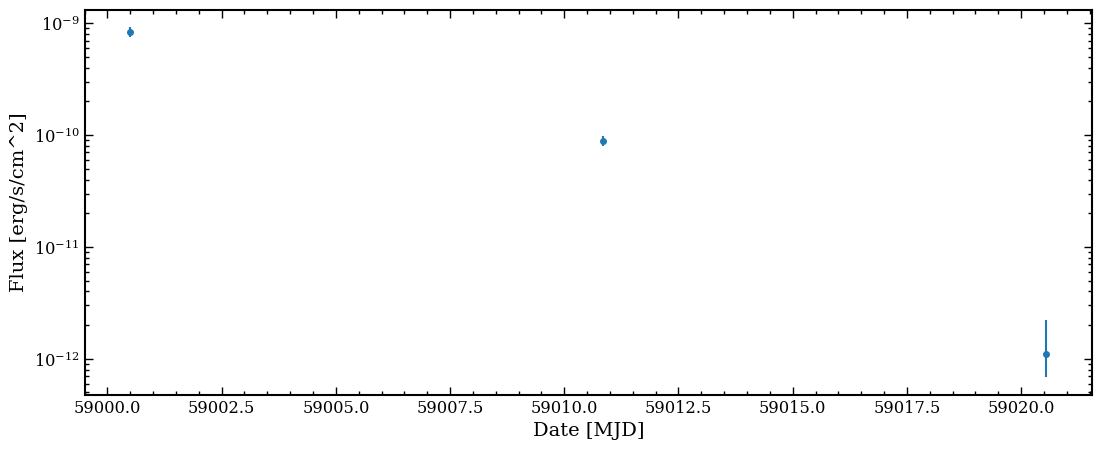

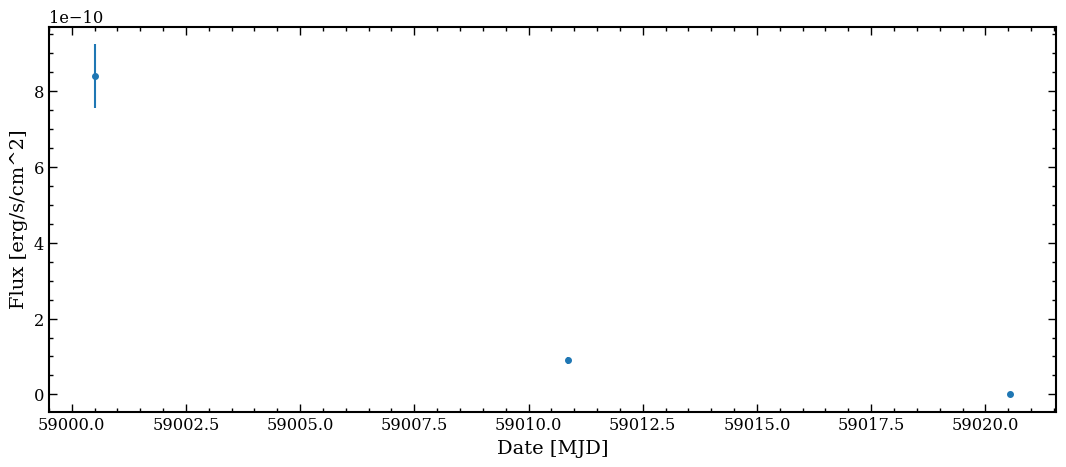

In [6]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

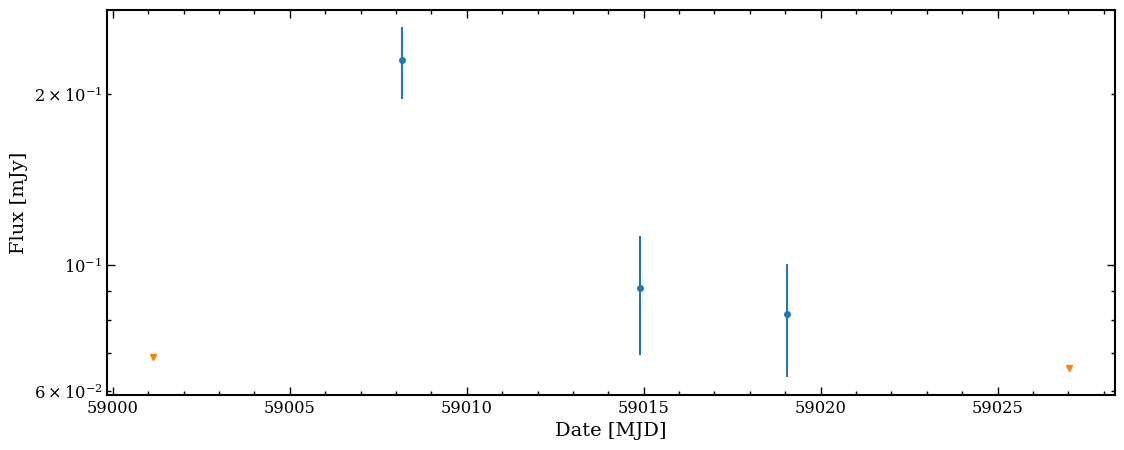

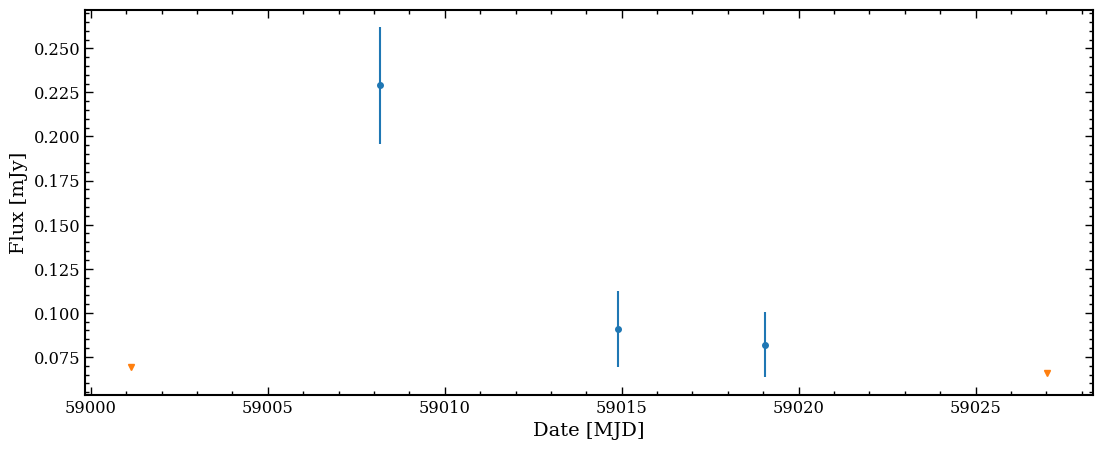

In [7]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing
Note in the original paper, they choose a bin size of 3 days. Also, they plotted for 5GHz, assuming a flat spectral index (i.e. the fluxes are the same at the two frequencies)...  

In [8]:
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
59001.129200000     0.06900             0.02300             1         8.40400e-10                   8.41171e-11                   8.41171e-11                   True           False          SS             
Converting to luminosity using d_kpc = 8.12


In [9]:
lr_all, lx_all, all_types = get_bahramian_data()

c:\Users\justi\OneDrive\Desktop\OXFORD_PROJECT\FINAL_LR_LX_PLANE_ANALYSIS\lrlx_paper_venv\Lib\site-packages\matplotlib\cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


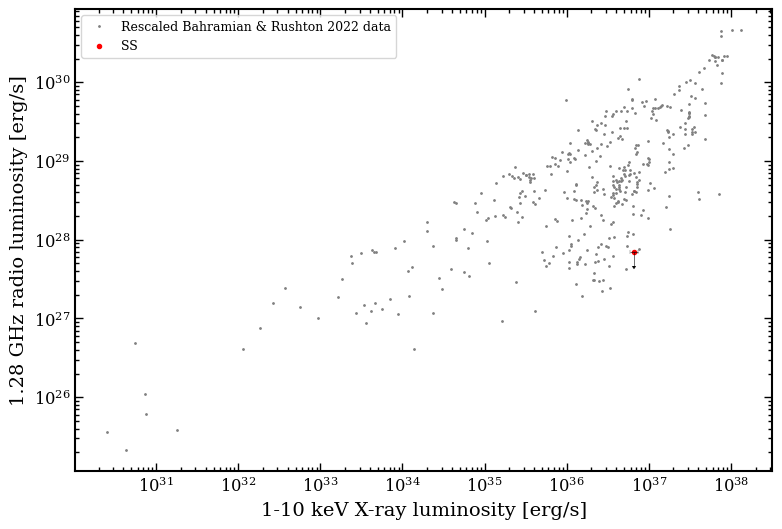

In [10]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

# Interpolation

dt1, dt2:  3.0 10.0

Number of plotting points:  40
59001.1292: time_to_nearest: 0.6284000000014203 & time_to_furthest: 9.72559999999794; y_predict_err: 0.0437903076082069
59008.1762: time_to_nearest: 2.6785999999992782 & time_to_furthest: 7.6754000000000815; y_predict_err: 0.0548018265706709
Rejected based on distance: radio_MJD = 59014.8972; time_to_nearest: 4.042399999998452; time_to_furthest: 5.652600000001257
59019.0632: time_to_nearest: 1.4866000000038184 & time_to_furthest: 8.20839999999589; y_predict_err: 0.2313497845217931
Rejected based on distance: radio_MJD = 59027.0132; time_to_nearest: 6.463400000000547; time_to_furthest: inf

LOG ERRORS:
[0.04379031 0.05480183        nan 0.23134978        nan]



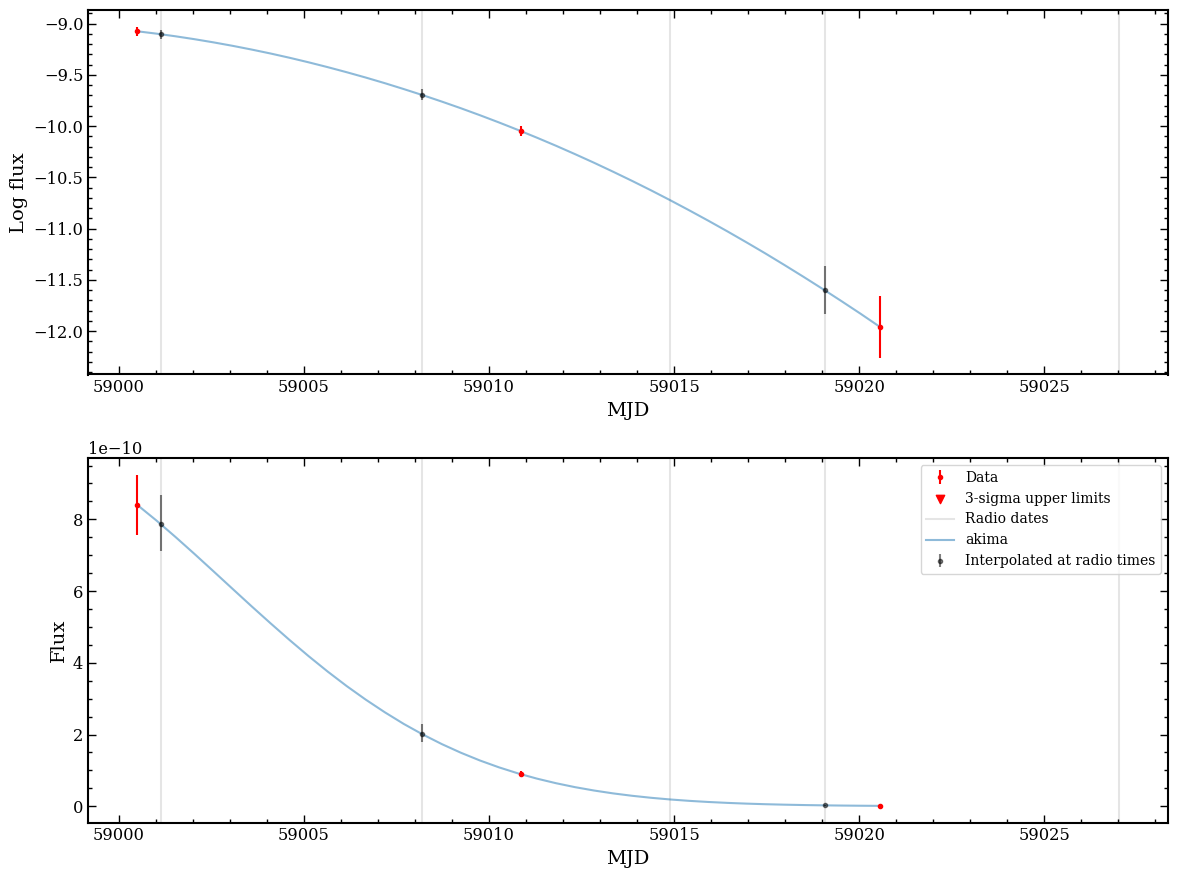

Number of used interpolated data points:  3
Converting to luminosity using d_kpc = 8.12


In [11]:
interpolated_data = make_interpolated_Lr_Lx_df(radio_df, xray_df, source_df, plotly=True)

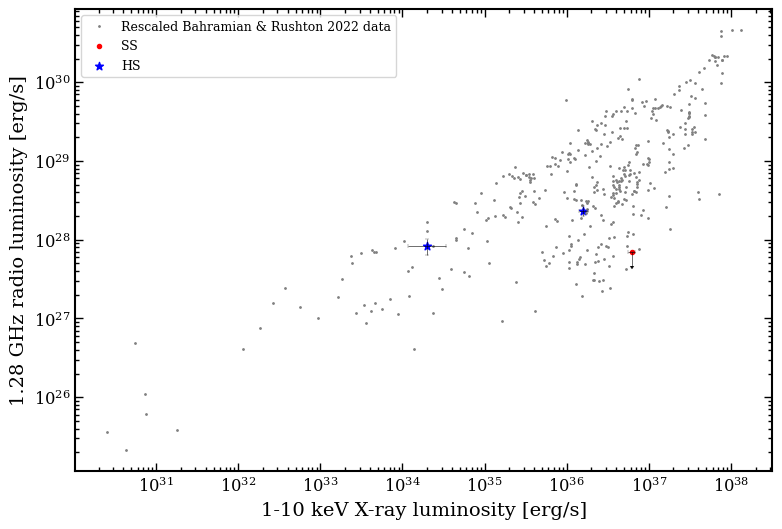

In [12]:
plot_Lr_Lx(interpolated_data, colourby="state", lx=lx_all, lr=lr_all)